# Análise das recomendações

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
df = pd.read_csv('../../data/movie_recommendation.csv')

### Analisando o threshold original de 2.5

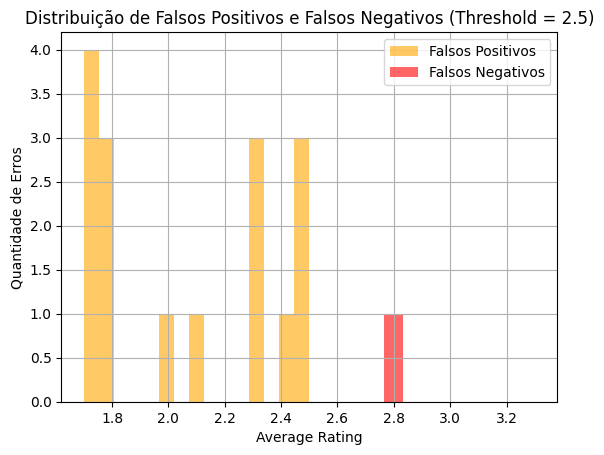

In [23]:
threshold = 2.5

# Falsos Positivos: nota > 2.5 e sentimento negativo
fp = df[(df['average_rating'] <= threshold) & (df['recommendation'] == 1)]

# Falsos Negativos: nota <= 2.5 e sentimento positivo
fn = df[(df['average_rating'] > threshold) & (df['recommendation'] == -1)]

# Plotar histogramas sobrepostos
plt.hist(fp['average_rating'], bins=15, alpha=0.6, label='Falsos Positivos', color='orange')
plt.hist(fn['average_rating'], bins=15, alpha=0.6, label='Falsos Negativos', color='red')

plt.xlabel('Average Rating')
plt.ylabel('Quantidade de Erros')
plt.title('Distribuição de Falsos Positivos e Falsos Negativos (Threshold = 2.5)')
plt.legend()
plt.grid(True)
plt.show()

### Testando o melhor average rating de corte

0.81


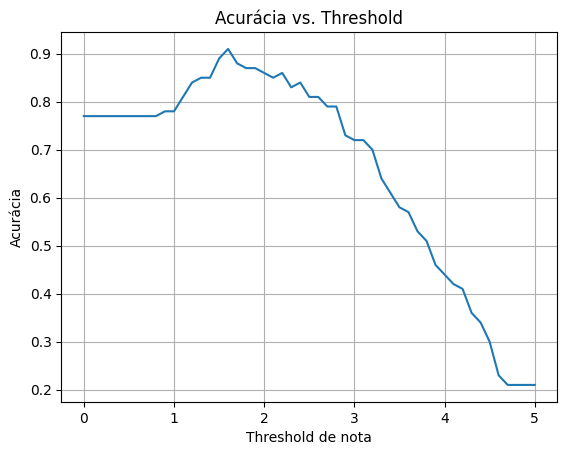

In [19]:
thresholds = np.arange(0, 5.1, 0.1)

accuracies = []

best_accuracy = 0
best_threshold = 0
for threshold in thresholds:
    match = ((df['average_rating'] <= threshold) & (df['recommendation'] == -1)) | \
            ((df['average_rating'] > threshold) & (df['recommendation'] == 1))
    accuracy = match.sum() / len(df)
    accuracies.append(accuracy)
    if threshold == 2.5:
        print(accuracy)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold

plt.plot(thresholds, accuracies)
plt.xlabel('Threshold de nota')
plt.ylabel('Acurácia')
plt.title('Acurácia vs. Threshold')
plt.grid(True)
plt.show()

In [21]:
print('Best accuracy: %.2f%%' % best_accuracy)
print('Best threshold: %.1f' % best_threshold)

Best accuracy: 0.91%
Best threshold: 1.6
